# ANLY 590 - HW2

## Problem 1 Feedforward: Building a ReLU neural network

Problem 1.1  Draw a network with: <br>
• 2 inputs <br>
• 1 hidden layers with 4 hidden units and a <br>
• 1-class output (for binary classification) <br>


![title](hw2p1.png)

Problem 1.2 <br>
Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

![title](hw2p12.png)

Problem 1.3 <br> Write out the forward-pass function in python, call it ff nn ReLu(...)


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def ReLu(x):    
    return np.maximum(0,x)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.array(x)))

def ff_nn_ReLu(x,W,V,b,c):
    h = ReLu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,V) + c)
    return y

Problem 1.4 <br>
what are the class probabilities associated with the forward pass of each sample? 

In [2]:
W1 = np.array([[1, -1, 0, 1],[0,0,.5,1]])
b1 = np.array([0,0,1,0])
V = np.array([[1],[0],[-1],[1]])
c = np.array([1])
X = np.array([[1,-1],[0,-1],[0,1]])

In [3]:
ff_nn_ReLu(X, W1,V, b1,c)

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

## Problem 2: Gradient Descent

Problem 2.1 <br> What are the partial derivatives of f with respect to x and to y?

![title](hw2p2.png)

Problem 2.2 Create a visualization of the contours of this function.

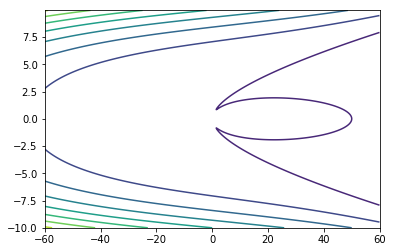

In [4]:
delta = 0.05
x = np.arange(-60, 60.0, delta)
y = np.arange(-10.0, 10.0, delta)
X,Y=np.meshgrid(x,y)

Z = (3-X**3) + 50*(2*Y**2-X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

Problem 2.3 <br>
Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [5]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 100*(2*y**2-x)
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point, iterations, learning_rate):
    # your code here
    if starting_point is None:
        point = np.random.uniform(-10,10, size = 2)
    else:
        point = starting_point
    trajectory =[point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
        
    return np.array(trajectory)

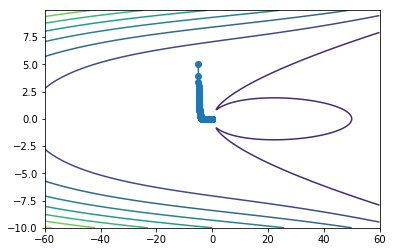

In [7]:
###learning rate: 0.00001
np.random.seed(10)
point = [-5,5]
traj = grad_descent(starting_point = point, iterations=10000, learning_rate=0.00001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]

plt.plot(x,y,'-o')

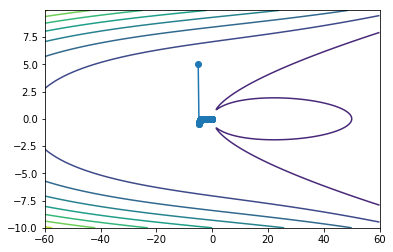

In [8]:
###learning rate: 0.00005
np.random.seed(10)
point = [-5,5]
traj = grad_descent(starting_point = point, iterations=10000, learning_rate=0.00005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

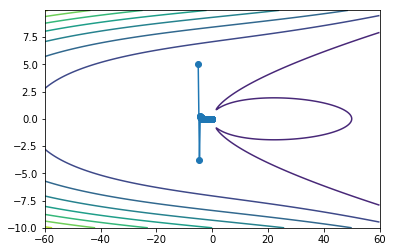

In [9]:
###learning rate: 0.00008
np.random.seed(10)
point = [-5,5]
traj = grad_descent(starting_point = point, iterations=10000, learning_rate=0.00008)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

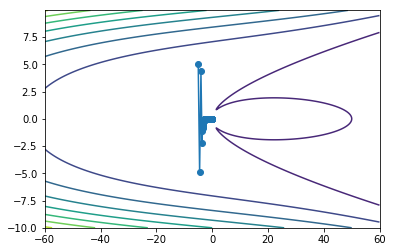

In [10]:
###learning rate: 0.0001
np.random.seed(10)
point = [-5,5]
traj = grad_descent(starting_point = point, iterations=1000, learning_rate=0.00009)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

With a larger learning rate, it will result in a faster convergence and bouncing around.

Problem 2.4 <br>
Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [15]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is not None:
        point = starting_point
    else:
        point = np.random.uniform(-10, 10, size = 2)
    
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha *v + epsilon * grad
        point = point - v
        trajectory.append(point)
        
    return np.array(trajectory)

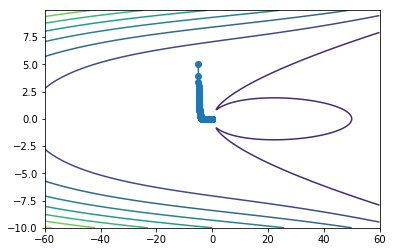

In [16]:
###epsilon = 0.00001, alpha = 0.05

np.random.seed(10)
point = np.array([-4,4])
traj = grad_descent_with_momentum(starting_point = point, iterations=10000, epsilon=0.00001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

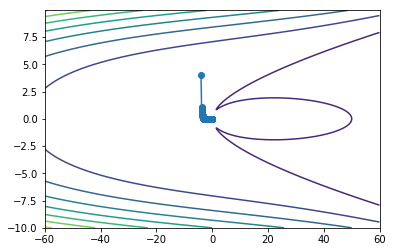

In [21]:
###epsilon = 0.00005, alpha = 0.001

np.random.seed(10)

point = np.array([-4,4])
traj = grad_descent_with_momentum(starting_point = point, iterations=10000, epsilon=0.00005, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

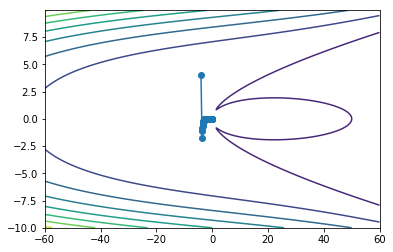

In [20]:
###epsilon = 0.0001, alpha = 0.001

np.random.seed(10)
point = np.array([-4,4])
traj = grad_descent_with_momentum(starting_point = point, iterations=10000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

with an increasing of epsilon, it will result in a faster convergence rate. 

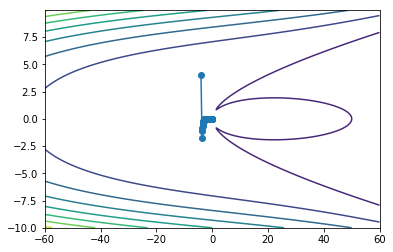

In [123]:
###epsilon = 0.0001, alpha = 0.001

np.random.seed(10)

traj = grad_descent_with_momentum(starting_point = point, iterations=10000, epsilon=0.0001, alpha=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

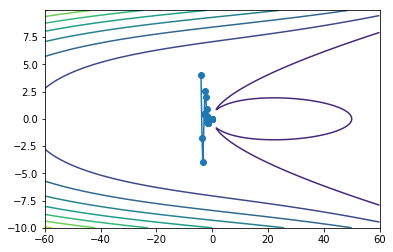

In [22]:
###epsilon = 0.0001, alpha = 0.5

np.random.seed(10)

traj = grad_descent_with_momentum(starting_point = point, iterations=10000, epsilon=0.0001, alpha=0.5)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

Apparently alpha has a smaller impact on the convergence than the effect of epsilon. But it still could be tell that as alpha increased, it will result in a faster convergence and might cause some bouncing as well.

# Problem 3 Backprop

Problem 3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

![title](hw2p3.png)

Problem 3.2 <br>
Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.


In [47]:
# Utilities
def bi_loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_d(x):
    return np.where(x>0, 1, 0)

def dLoss(y, y_hat):
    # dL_dYhat
    return -(y/y_hat - (1-y)/(1-y_hat))

In [48]:


def grad_f(x, y,model_params):
    W, V, b, c = model_params
    yhat = ff_nn_ReLu(x, W, V, b, c)
    loss = bi_loss(y, yhat)
    d_loss = dLoss(y,yhat)
    h = relu(np.dot(x,W) + b)
    dc = d_loss * sigmoid(np.dot(h, V) + c)*(1 - sigmoid(np.dot(h,V) + c))
    dV = np.dot(dc.T, h).T
    db = np.where(np.dot(x,W)+b>0, 1, 0) * np.dot(d_loss, V.T)
    dW = np.dot(x.T, db)
    return loss, np.average(dc, axis=0), dV, np.average(db, axis=0), dW

Problem 3.3 Generate a synthetic dataset like the XOR pattern (see below).

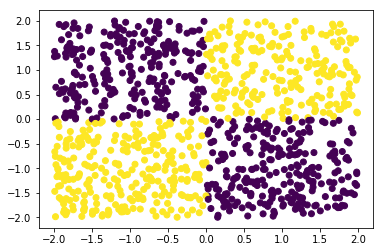

In [49]:
x = np.random.uniform(low=-2,high=2,size=(1000,2))
y = np.where(x[:, 0] * x[:, 1] >0 , 1, 0)

plt.scatter(x[:,0],x[:,1],c=y)

Problem 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [50]:
def grad_descent(x, y, model_params, iters, alpha):
    W, V, b, c = model_params
    losses = []
    params = np.array([W, V, b, c])
    for i in range(iters):
        loss, dc, dV, db, dW = grad_f(x, y, model_params)
        losses.append(loss)
        grads = np.array([dW, dV, db, dc])
        params = params - grads * alpha
        model_params = params
    return losses, model_params

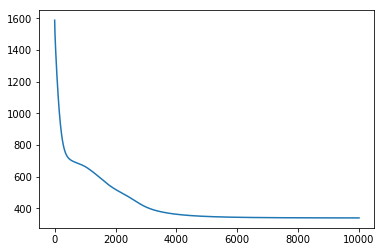

In [59]:
W = np.random.uniform(size=8).reshape(2,4)
V = np.random.uniform(size=4).reshape(4,1)
b = np.random.uniform(size=4).reshape(1,4)
c = np.random.uniform(size=1).reshape(1,1)
Y = np.where(y, 1, 0).reshape(1000,1)

loss, param= grad_descent(x, Y, (W,V,b,c), 10000, 0.00001)
plt.plot(loss)